MOVIE DATASET ANALYSIS

In [1]:
from ydata_profiling import ProfileReport
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
# pf = ProfileReport(df)
# pf.to_file(output_file='report.html')


In [4]:
df.sample()

,id,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,...,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars
22892,tt11306376,Jathi Ratnalu,https://www.imdb.com/title/tt11306376,2021,2h 25m,NaN,7.3,8.4K,NaN,731273.0,...,['Anudeep K.V.'],"['Naveen Polishetty', 'Rahul Ramakrishna', 'Pr...",['Comedy'],['India'],NaN,['Swapna Cinema'],['Telugu'],0,15,0


In [58]:
wow = df[['Rating','nominations']]
wow.dropna(inplace=True)

C:\Users\Default\AppData\Local\Temp\ipykernel_20008\1615582358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wow.dropna(inplace=True)


In [59]:
wow

,Rating,nominations
0,8.1,20
1,7.4,4
2,8.7,15
3,8.0,20
4,6.4,11
...,...,...
33595,7.3,2
33596,4.9,0
33597,6.8,0
33598,6.3,0


In [87]:
wow['nominations'].max()

382

In [85]:
wow[wow['nominations'] == 394]

,Rating,nominations
14024,7.8,394


In [86]:
wow.drop(14024, inplace=True)

C:\Users\Default\AppData\Local\Temp\ipykernel_20008\643823084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wow.drop(14024, inplace=True)


C:\Users\Default\AppData\Local\Temp\ipykernel_20008\3676300656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.dropna(inplace=True)


<Axes: ylabel='Count'>

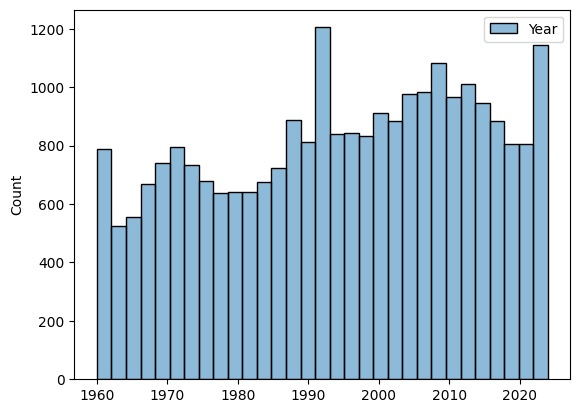

In [57]:
a = df[['Year','MPA']]
# sns.pairplot(a)
a.dropna(inplace=True)
sns.histplot(a)

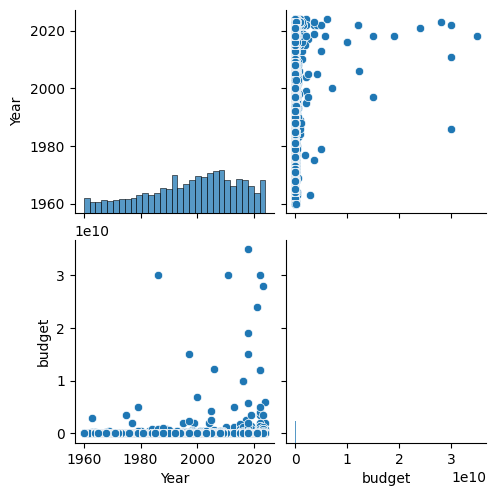

In [10]:
sns.pairplot(wow)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33600 non-null  object 
 1   Title                  33600 non-null  object 
 2   Movie Link             33600 non-null  object 
 3   Year                   33600 non-null  int64  
 4   Duration               33379 non-null  object 
 5   MPA                    25624 non-null  object 
 6   Rating                 33462 non-null  float64
 7   Votes                  33462 non-null  object 
 8   budget                 11815 non-null  float64
 9   grossWorldWide         18222 non-null  float64
 10  gross_US_Canada        17571 non-null  float64
 11  opening_weekend_Gross  15523 non-null  float64
 12  directors              33241 non-null  object 
 13  writers                32024 non-null  object 
 14  stars                  33127 non-null  object 
 15  ge

In [12]:
df['budget'].isnull().sum() 

21785

In [13]:
df.drop(columns=['id','Title','Movie Link','wins','budget','grossWorldWide','gross_US_Canada','opening_weekend_Gross','filming_locations'],inplace=True)

In [14]:
# df['production_companies'].str.split(',').value_counts()

In [15]:
a = df[['Rating','production_companies']]

In [16]:
a['production_companies'] = a['production_companies'].str.split(', ')

C:\Users\Default\AppData\Local\Temp\ipykernel_20008\3059322958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['production_companies'] = a['production_companies'].str.split(', ')


In [17]:
a.explode('production_companies')

,Rating,production_companies
0,8.1,['Zanuck/Brown Productions'
0,8.1,'Universal Pictures']
1,7.4,['Twentieth Century Fox'
1,7.4,'Michael White Productions']
2,8.7,['Fantasy Films'
...,...,...
33595,7.3,'Productions Pacific']
33596,4.9,NaN
33597,6.8,['Filmation Associates']
33598,6.3,['Molesworth Limited']


In [147]:
df['Votes'].values

array(['683K', '173K', '1.1M', ..., '1.3K', '337', '737'], dtype=object)

In [18]:
df.head()

,Year,Duration,MPA,Rating,Votes,directors,writers,stars,genres,countries_origin,production_companies,Languages,nominations,oscars
0,1975,2h 4m,PG,8.1,683K,['Steven Spielberg'],"['Peter Benchley', 'Carl Gottlieb']","['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...","['Monster Horror', 'Sea Adventure', 'Survival'...",['United States'],"['Zanuck/Brown Productions', 'Universal Pictur...",['English'],20,0
1,1975,1h 40m,R,7.4,173K,['Jim Sharman'],"[""Richard O'Brien"", 'Jim Sharman']","['Tim Curry', 'Susan Sarandon', 'Barry Bostwick']","['Dark Comedy', 'Raunchy Comedy', 'Rock Musica...","['United Kingdom', 'United States']","['Twentieth Century Fox', 'Michael White Produ...",['English'],4,0
2,1975,2h 13m,R,8.7,1.1M,['Milos Forman'],"['Lawrence Hauben', 'Bo Goldman', 'Ken Kesey']","['Jack Nicholson', 'Louise Fletcher', 'Michael...","['Medical Drama', 'Psychological Drama', 'Drama']",['United States'],"['Fantasy Films', 'N.V. Zvaluw']",['English'],15,0
3,1975,2h 5m,R,8.0,279K,['Sidney Lumet'],"['Frank Pierson', 'P.F. Kluge', 'Thomas Moore']","['Al Pacino', 'John Cazale', 'Penelope Allen']","['Heist', 'True Crime', 'Biography', 'Crime', ...",['United States'],"['Warner Bros.', 'Artists Entertainment Complex']",['English'],20,0
4,1975,1h 50m,R,6.4,15K,['Hal Ashby'],"['Robert Towne', 'Warren Beatty']","['Warren Beatty', 'Julie Christie', 'Goldie Ha...","['Satire', 'Comedy', 'Drama']",['United States'],"['Persky-Bright / Vista', 'Columbia Pictures',...",['English'],11,0


In [106]:
df['Duration'].isnull().sum()

221

In [109]:
df['Duration'].unique()

array(['2h 4m', '1h 40m', '2h 13m', '2h 5m', '1h 50m', '1h 53m', '2h 16m',
       '1h 51m', '1h 57m', '1h 58m', '1h 47m', '1h 25m', '1h 37m',
       '2h 1m', '2h 9m', '1h 59m', '1h 44m', '2h 40m', '1h 39m', '1h 31m',
       '1h 46m', '2h 6m', '1h 24m', '1h 55m', '1h 35m', '1h 49m',
       '1h 56m', '1h 48m', '1h 36m', '3h 5m', '1h 20m', '1h 29m',
       '1h 38m', '1h 28m', '2h 7m', '3h 22m', '1h 30m', '1h 27m',
       '1h 33m', '2h 22m', '1h 45m', '2h 42m', '2h 24m', '2h 20m',
       '1h 23m', '2h 54m', '1h 52m', '1h 42m', '2h', '2h 2m', '1h 34m',
       '1h 32m', '1h 15m', '2h 12m', '1h 43m', '2h 32m', '1h 41m',
       '1h 14m', '1h 26m', '2h 26m', '2h 15m', '2h 30m', '2h 10m',
       '1h 22m', '1h 16m', '1h 21m', '1h 13m', '53m', '1h 19m', '3h 50m',
       '2h 38m', '2h 25m', '2h 43m', '2h 50m', '2h 36m', '1h 1m', nan,
       '1h 18m', '2h 39m', '2h 19m', '1h 7m', '2h 11m', '1h 54m',
       '1h 17m', '1h 9m', '2h 3m', '2h 33m', '2h 57m', '1h 3m', '2h 35m',
       '2h 23m', '1h 12m', 

In [140]:
df[df['Duration'] == 'PG-13']
df.drop([7820,8604,28265], inplace=True)

In [141]:
df['Duration'].value_counts(dropna=False).index.str.split(' ').str[0].str.split('h').str[0].value_counts()

Duration
1      60
2      60
3      49
4      16
5      11
6       3
7       2
49m     1
87      1
25      1
43m     1
8       1
9       1
44m     1
12      1
40m     1
46m     1
51m     1
47m     1
57m     1
54m     1
53m     1
56m     1
50m     1
52m     1
58m     1
48m     1
59m     1
45m     1
55m     1
48      1
Name: count, dtype: int64

In [100]:
df['Year'].value_counts().sort_index().index

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='Year')

<Axes: xlabel='Year', ylabel='Count'>

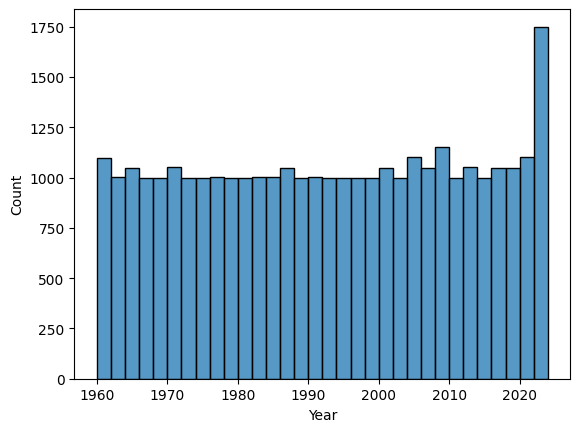

In [101]:
sns.histplot(df['Year'])

In [19]:
#MPA 23% missing values
df['MPA']

0         PG
1          R
2          R
3          R
4          R
        ... 
33595      R
33596    NaN
33597     PG
33598    NaN
33599     PG
Name: MPA, Length: 33600, dtype: object